In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

%matplotlib inline
sns.set_style('dark')

In [153]:
df = pd.read_csv('../data/travel_insurance.csv')

In [6]:
ProfileReport(df, title='travel_insurance_report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [154]:
import numpy as np

In [155]:
df = df.loc[(df['Age'] <= 100) & (df['Net Sales'] > 0) & (df['Duration'] <= 547), :]

df['claim_count'] = df['Claim'].apply(lambda x: np.where(x == 'Yes', 1, 0))


In [156]:
df.shape

(59797, 12)

In [157]:
one_way = df.groupby(['Duration']).agg(
    {
        'claim_count': 'sum',
        'Claim': 'count'
    }
)

one_way['claim_freq'] = one_way['claim_count'] / one_way['Claim']

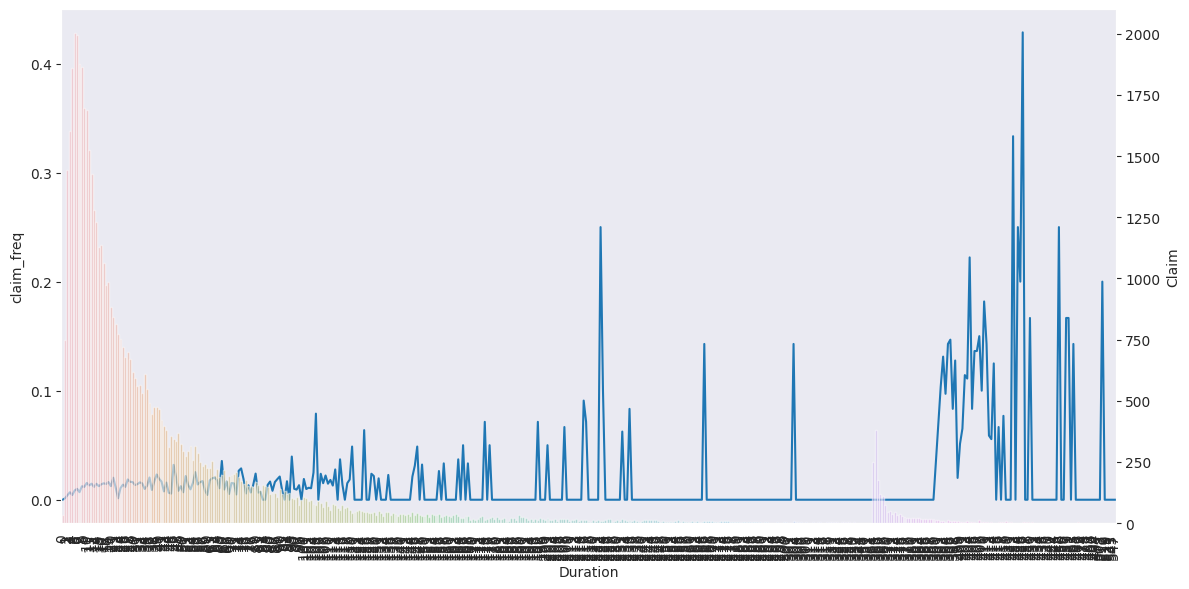

In [158]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
sns.lineplot(data=one_way, x=one_way.index, y='claim_freq', ax=ax1)
sns.barplot(data=one_way, x=one_way.index, y='Claim', alpha=0.5, ax=ax2)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)

In [159]:
df.loc[df['Duration'] > 365, :]['Product Name'].unique()

array(['Annual Silver Plan', 'Annual Gold Plan',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan',
       'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
       'Annual Travel Protect Silver', 'Child Comprehensive Plan',
       'Bronze Plan'], dtype=object)